In [ ]:
# Creating cell_gene_matrix

import gzip
import scanpy as sc
import pandas as pd
adata = sc.read_mtx('GSE186069_gene_count.mtx.gz')
with gzip.open('GSE186069_gene_annotate.csv.gz', 'rb') as f:
    features = pd.read_csv(f, sep=',')
with gzip.open('GSE186069_cell_annotate.csv.gz', 'rb') as f:
    cells = pd.read_csv(f, sep=',')

In [ ]:
# Creating an Anndata file
import anndata as ad
adata_1 = ad.AnnData(
    X=adata.transpose().X,
    obs=cells,
    var=features
)

In [15]:
import scanpy as sc
adata_1 = sc.read_h5ad('dataset_1_raw.h5ad')

In [6]:
adata_1

AnnData object with n_obs × n_vars = 152654 × 49585
    obs: 'sample', 'UMI_count', 'gene_count', 'unmatched_rate', 'doublet_score', 'somite_number', 'embryo_sex', 'development_stage', 'celltype', 'removed_by_low_quality_or_doublets', 'RT_group'
    var: 'gene_id', 'gene_type', 'gene_short_name', 'chr', 'start', 'end', 'strand'

In [7]:
adata_1.obs

,sample,UMI_count,gene_count,unmatched_rate,doublet_score,somite_number,embryo_sex,development_stage,celltype,removed_by_low_quality_or_doublets,RT_group
0,P2-01A.ATTCAAGCATGTTACGCAAG,7563,3405,0.1095,0.0080,11,F,8.5,Forebrain/midbrain,No,E8.5_test2-1
1,P2-01A.CCGTCGATTTTATTCTGAG,5964,2967,0.1318,0.0108,12,M,8.5,Somatic mesoderm,No,E8.5_test2-8
2,P2-01A.ATGGTAACTTAGCCGGTACC,4968,2298,0.1796,0.0037,12,M,8.5,Primitive erythroid cells,No,E8.5_test2-8
3,P2-01A.CCGACCAATTTGCGAGGCA,2340,1367,0.1136,0.0187,8,M,8.5,Pre-epidermal keratinocytes,No,E8.5_test2-7
4,P2-01A.CAGGACTCTAATGCCGCTT,5043,2549,0.1842,0.0493,9,F,8.5,NaN,Yes,E8.5_test2-2
...,...,...,...,...,...,...,...,...,...,...,...
239525,PE-11A.AAGCAGTATTTATAGACGCA,7370,3608,0.1029,0.0688,10,F,8.5,Placodal area,No,E8.5_test2-3
239527,PE-11A.CGGTAAGGTTAACTCTTAG,10463,4161,0.1248,0.0279,8,M,8.5,Neuromesodermal progenitors,No,E8.5_test2-7
239528,PE-11A.ATCTTCAGATTAACGATCCA,7741,3486,0.1191,0.0234,12,M,8.5,Second heart field,No,E8.5_test2-8
239529,PE-11A.AGGCGGAATTAACTCAATT,8164,3621,0.1203,0.0114,10,F,8.5,Forebrain/midbrain,No,E8.5_test2-3


In [ ]:
import numpy as np
adata_1.var_names = adata_1.var['gene_short_name']
adata_1.var_names = adata_1.var_names.astype('category')

#removing low-quality cells (defined by the dataset creator)

mask = adata_1.obs['removed_by_low_quality_or_doublets'].isin(['No'])
adata_1 = adata_1[mask, :]

#Removing cells from earlier staged embryos

adata_1 = adata_1[adata_1.obs['somite_number'].isin(pd.array(np.linspace(8, 12, num=5, dtype=int)))]

#Leaving only protein-coding genes

adata_1 = adata_1[:, adata_1.var['gene_type'] == 'protein_coding']

In [19]:
#Quality control

sc.pp.calculate_qc_metrics(adata_1, inplace=True)

/home/nastya/.local/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:141: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics
/home/nastya/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nastya/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


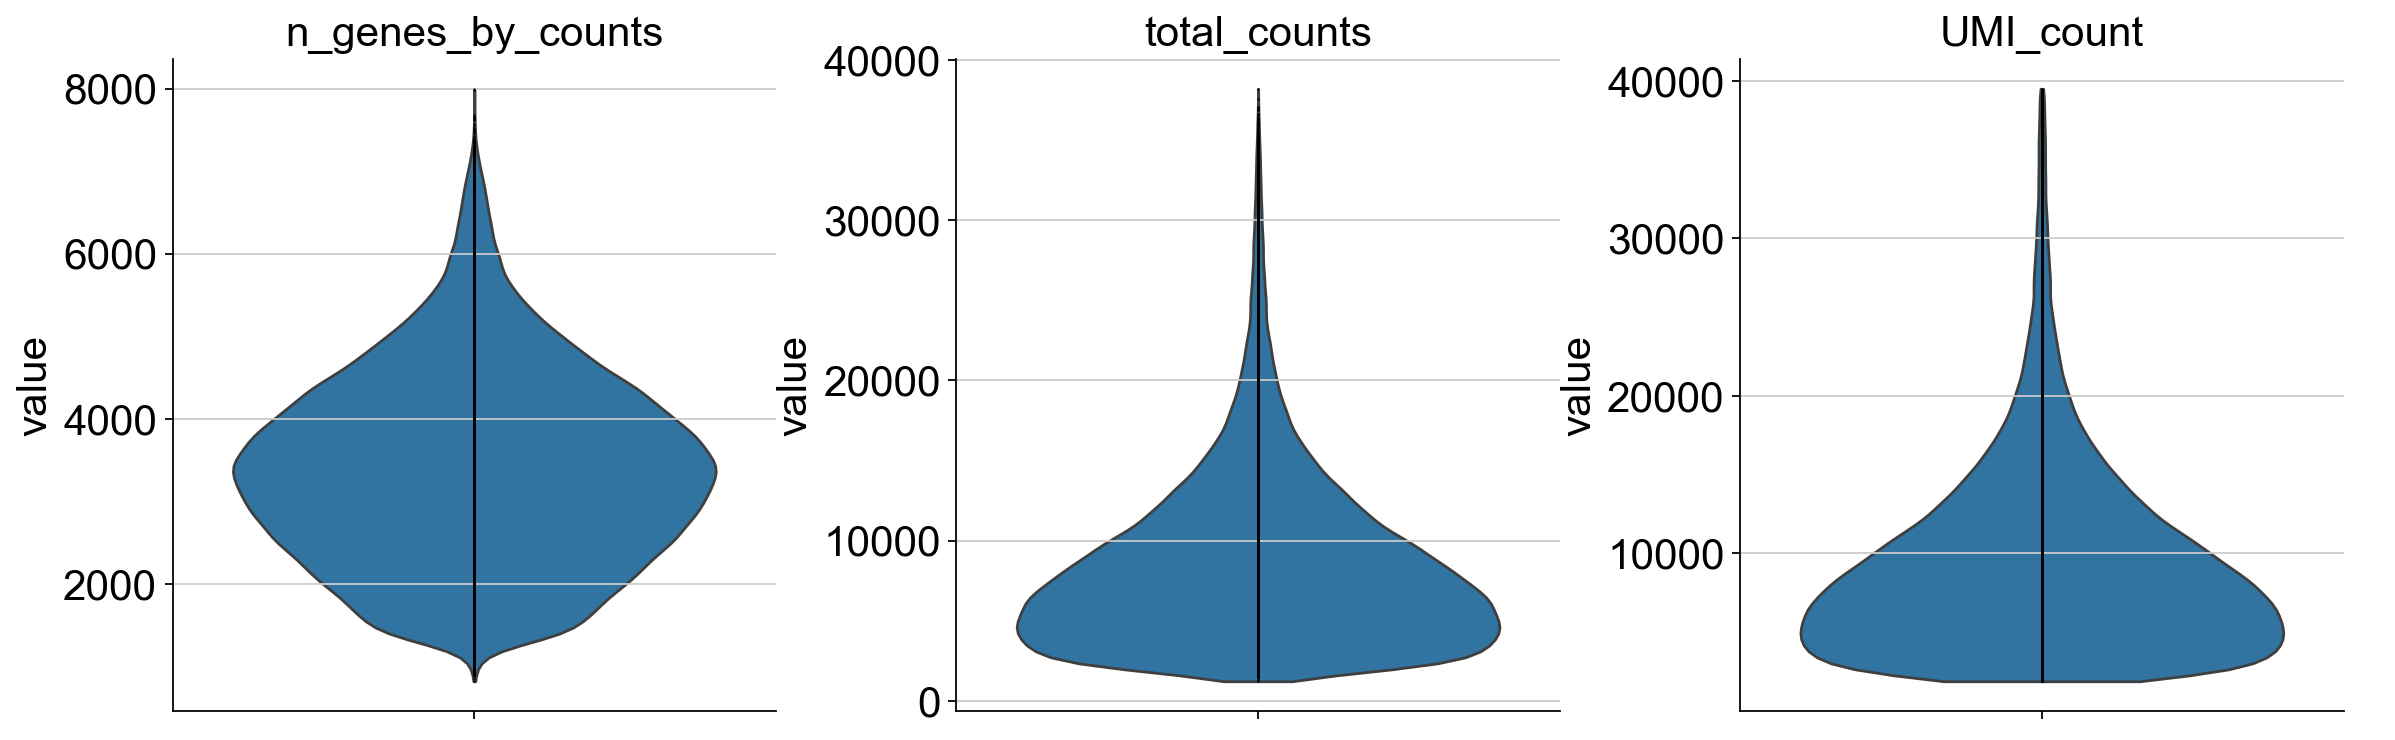

In [25]:
#Visualising quality control metrics
sc.set_figure_params(scanpy=True, fontsize=19)
sc.pl.violin(
    adata_1,
    ['n_genes_by_counts', 'total_counts', 'UMI_count'],
    jitter=False,
    multi_panel=True, save='QC.png'
)

In [ ]:
sc.pp.scrublet(adata_1)

In [ ]:
adata_1 = adata_1[adata_1.obs['predicted_doublet'] == False]

In [40]:
adata_1.obs

,sample,UMI_count,gene_count,unmatched_rate,doublet_score,somite_number,embryo_sex,development_stage,celltype,removed_by_low_quality_or_doublets,RT_group
0,P2-01A.ATTCAAGCATGTTACGCAAG,7563,3405,0.1095,0.0080,11,F,8.5,Forebrain/midbrain,No,E8.5_test2-1
1,P2-01A.CCGTCGATTTTATTCTGAG,5964,2967,0.1318,0.0108,12,M,8.5,Somatic mesoderm,No,E8.5_test2-8
2,P2-01A.ATGGTAACTTAGCCGGTACC,4968,2298,0.1796,0.0037,12,M,8.5,Primitive erythroid cells,No,E8.5_test2-8
3,P2-01A.CCGACCAATTTGCGAGGCA,2340,1367,0.1136,0.0187,8,M,8.5,Pre-epidermal keratinocytes,No,E8.5_test2-7
7,P2-01A.ATGCTTCCTAATGCCGCTT,5213,2856,0.1097,0.0256,9,F,8.5,Extraembryonic mesoderm,No,E8.5_test2-2
...,...,...,...,...,...,...,...,...,...,...,...
239525,PE-11A.AAGCAGTATTTATAGACGCA,7370,3608,0.1029,0.0688,10,F,8.5,Placodal area,No,E8.5_test2-3
239527,PE-11A.CGGTAAGGTTAACTCTTAG,10463,4161,0.1248,0.0279,8,M,8.5,Neuromesodermal progenitors,No,E8.5_test2-7
239528,PE-11A.ATCTTCAGATTAACGATCCA,7741,3486,0.1191,0.0234,12,M,8.5,Second heart field,No,E8.5_test2-8
239529,PE-11A.AGGCGGAATTAACTCAATT,8164,3621,0.1203,0.0114,10,F,8.5,Forebrain/midbrain,No,E8.5_test2-3


In [44]:
adata_1.write('single_cell_after_QC.h5ad')

In [1]:
#Quality control for slice 4

import pandas as pd
import scanpy as sc
table = pd.read_csv('xenium_5k_854.csv', sep = ',')
import anndata as ad

gene = "Epcam"

counts = table.groupby(['cell_id', 'feature_name']).size().unstack(fill_value=0)
adata_854 = ad.AnnData(
    X=counts.values,
    obs=pd.DataFrame(index=counts.index),
    var=pd.DataFrame(index=counts.columns)
)

In [2]:
sc.pp.calculate_qc_metrics(adata_854, inplace=True)

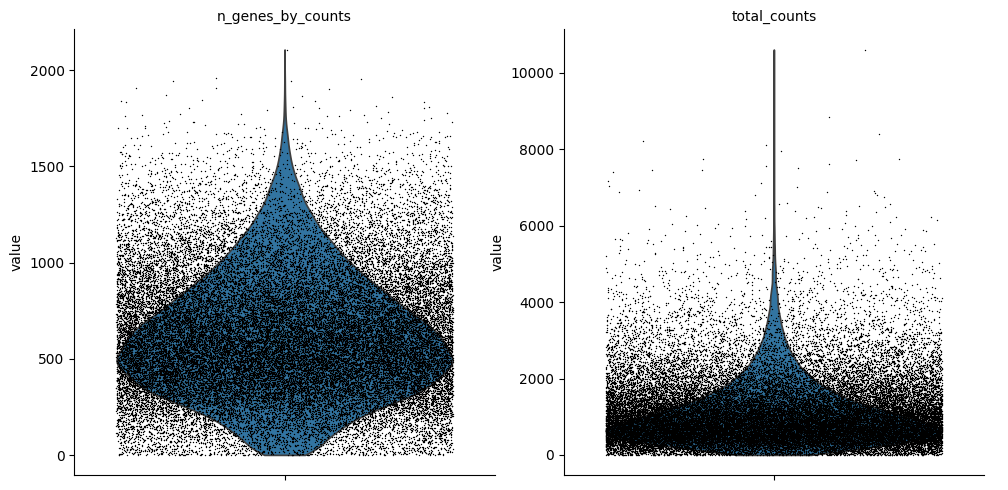

In [5]:
adata_854.var_names_make_unique()
sc.pl.violin(
    adata_854,
    ['n_genes_by_counts', 'total_counts'],
    jitter=0.4,
    multi_panel=True,
)

In [6]:
adata_854

AnnData object with n_obs × n_vars = 42777 × 5006
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [7]:
sc.pp.scrublet(adata_854)

In [11]:
adata_854.obs['predicted_doublet'].value_counts()

False    42719
True         1
Name: predicted_doublet, dtype: int64

In [45]:
#Quality control for slice 3

import pandas as pd
import scanpy as sc
table = pd.read_csv('xenium_5k_853.csv', sep = ',')
import anndata as ad

gene = "Epcam"

counts = table.groupby(['cell_id', 'feature_name']).size().unstack(fill_value=0)
adata_853 = ad.AnnData(
    X=counts.values,
    obs=pd.DataFrame(index=counts.index),
    var=pd.DataFrame(index=counts.columns)
)

In [46]:
sc.pp.calculate_qc_metrics(adata_853, inplace=True)

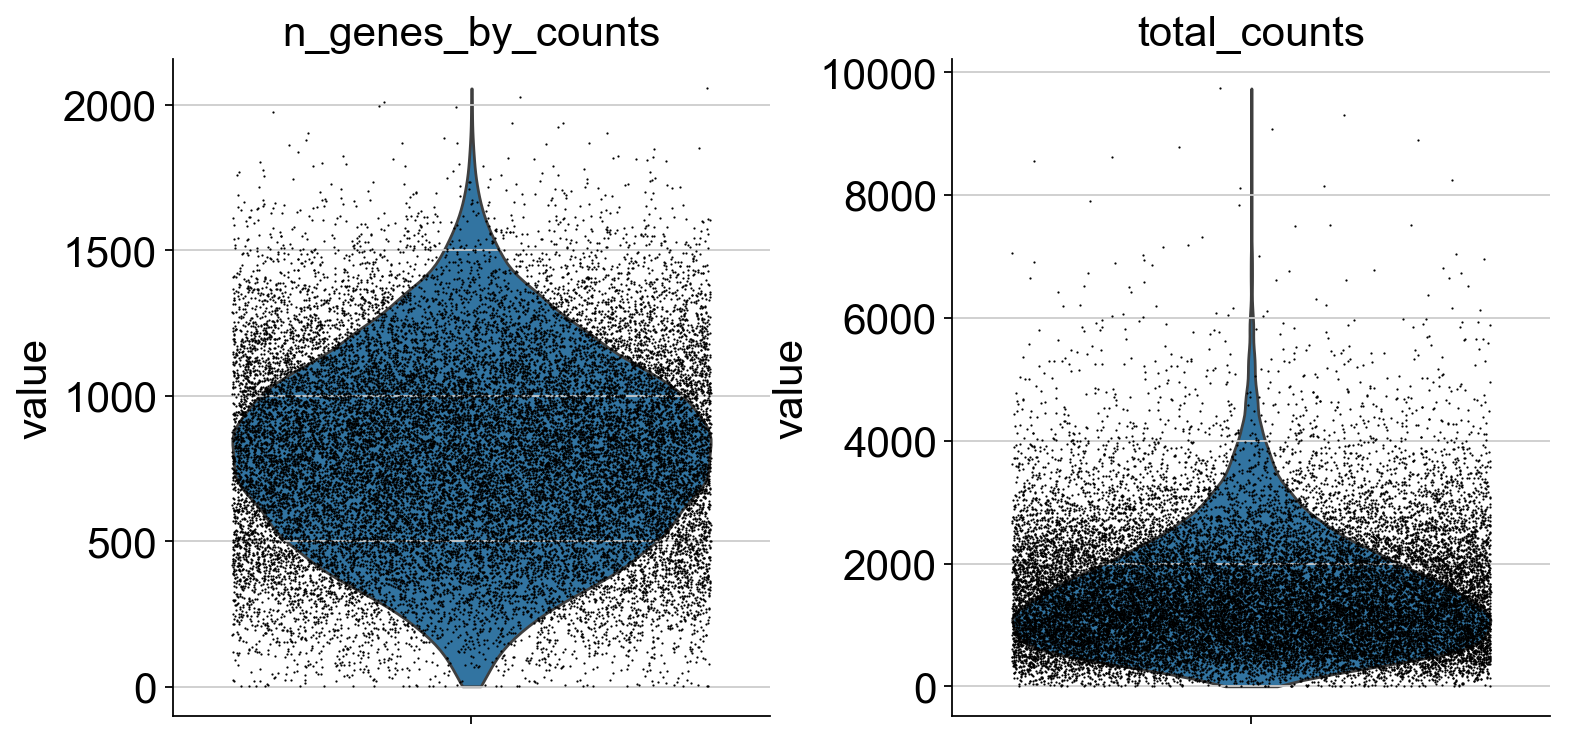

In [47]:
adata_853.var_names_make_unique()
sc.pl.violin(
    adata_853,
    ['n_genes_by_counts', 'total_counts'],
    jitter=0.4,
    multi_panel=True,
)

In [48]:
adata_853

AnnData object with n_obs × n_vars = 25833 × 5006
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [ ]:
sc.pp.scrublet(adata_853)

In [ ]:
adata_853.obs['predicted_doublet'].value_counts()